# Lyman Alpha Forest towards two QSOs

Figure 9.1 from Chapter 9 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

Plot spectra of the quasars 3C273 (z=0.158) and Q1422+2309 (z=3.62) showing differences in the amount
of Lyman-alpha forest absorption lines from intervening clouds along a short (3C273) and long (Q1422+3209)
line of sight.  Wavelengths are given in the emission rest frame. The Lyman alpha forest, resulting from 
intervening gas clouds, is seen to the left of the quasar's Lyman-$\alpha$ emission line.

Original data were provided by Prof. William Keel, University of Alabama, 
([Quasars as lighthouses](www.astr.ua.edu/keel/agn/forest.html)).

In [8]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

# Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.

In [9]:
figName = 'Fig9_1' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'png'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 6
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Spectral Data

Data are in a 2-column format, wavelength and arbitrary relative flux units (F$_\lambda$).

Bill Keel provided adjustments to the wavelenght and flux scales required.
 * 3C273 - need to de-redshift the 3C273 which are observed frame, and apply a flux scaling and shift
 * Q1422 - wavelengths are already de-reshifted have a small shift, and apply a flux scaling of 0.0001
 
These scalings put both spectra in the emitted (rest) frame and scale to a comparable flux of the
broad Ly-$\alpha$ emission line.  We've elected to apply these scalings in this notebook instead of
laundering the original files to preserve the original data.

In [10]:
# 3C273
#
# Bill Keel provided a wavelength and flux scaling fix we apply on input
#

dataFile = '3C273_STIS.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
lam3C = np.array(data['lam'])/1.158
flx3C = 10.0*np.array(data['flux']) + 12.5
z3C = 0.158

# Q1422+2309

dataFile = 'Q1422B10.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
lamQ1422 = 1215.67 + 0.98*(np.array(data['lam'])-1215.67)
flxQ1422 = 0.0001*np.array(data['flux'])
zQ1422 = 3.62

# Plotting Limits

xMin = 1000.0  # Angstroms
xMax = 1400.0

yMin = 0.05 # arbitrary flux range
yMax = 25.0

## Make the plot

Top panel is 3C273, bottom panel is Q1422+2309.  This is a pseudo 2-panel plot, made by applying an arbitrary
scale factor and shift to the fluxes to the 3C273 spectrum.

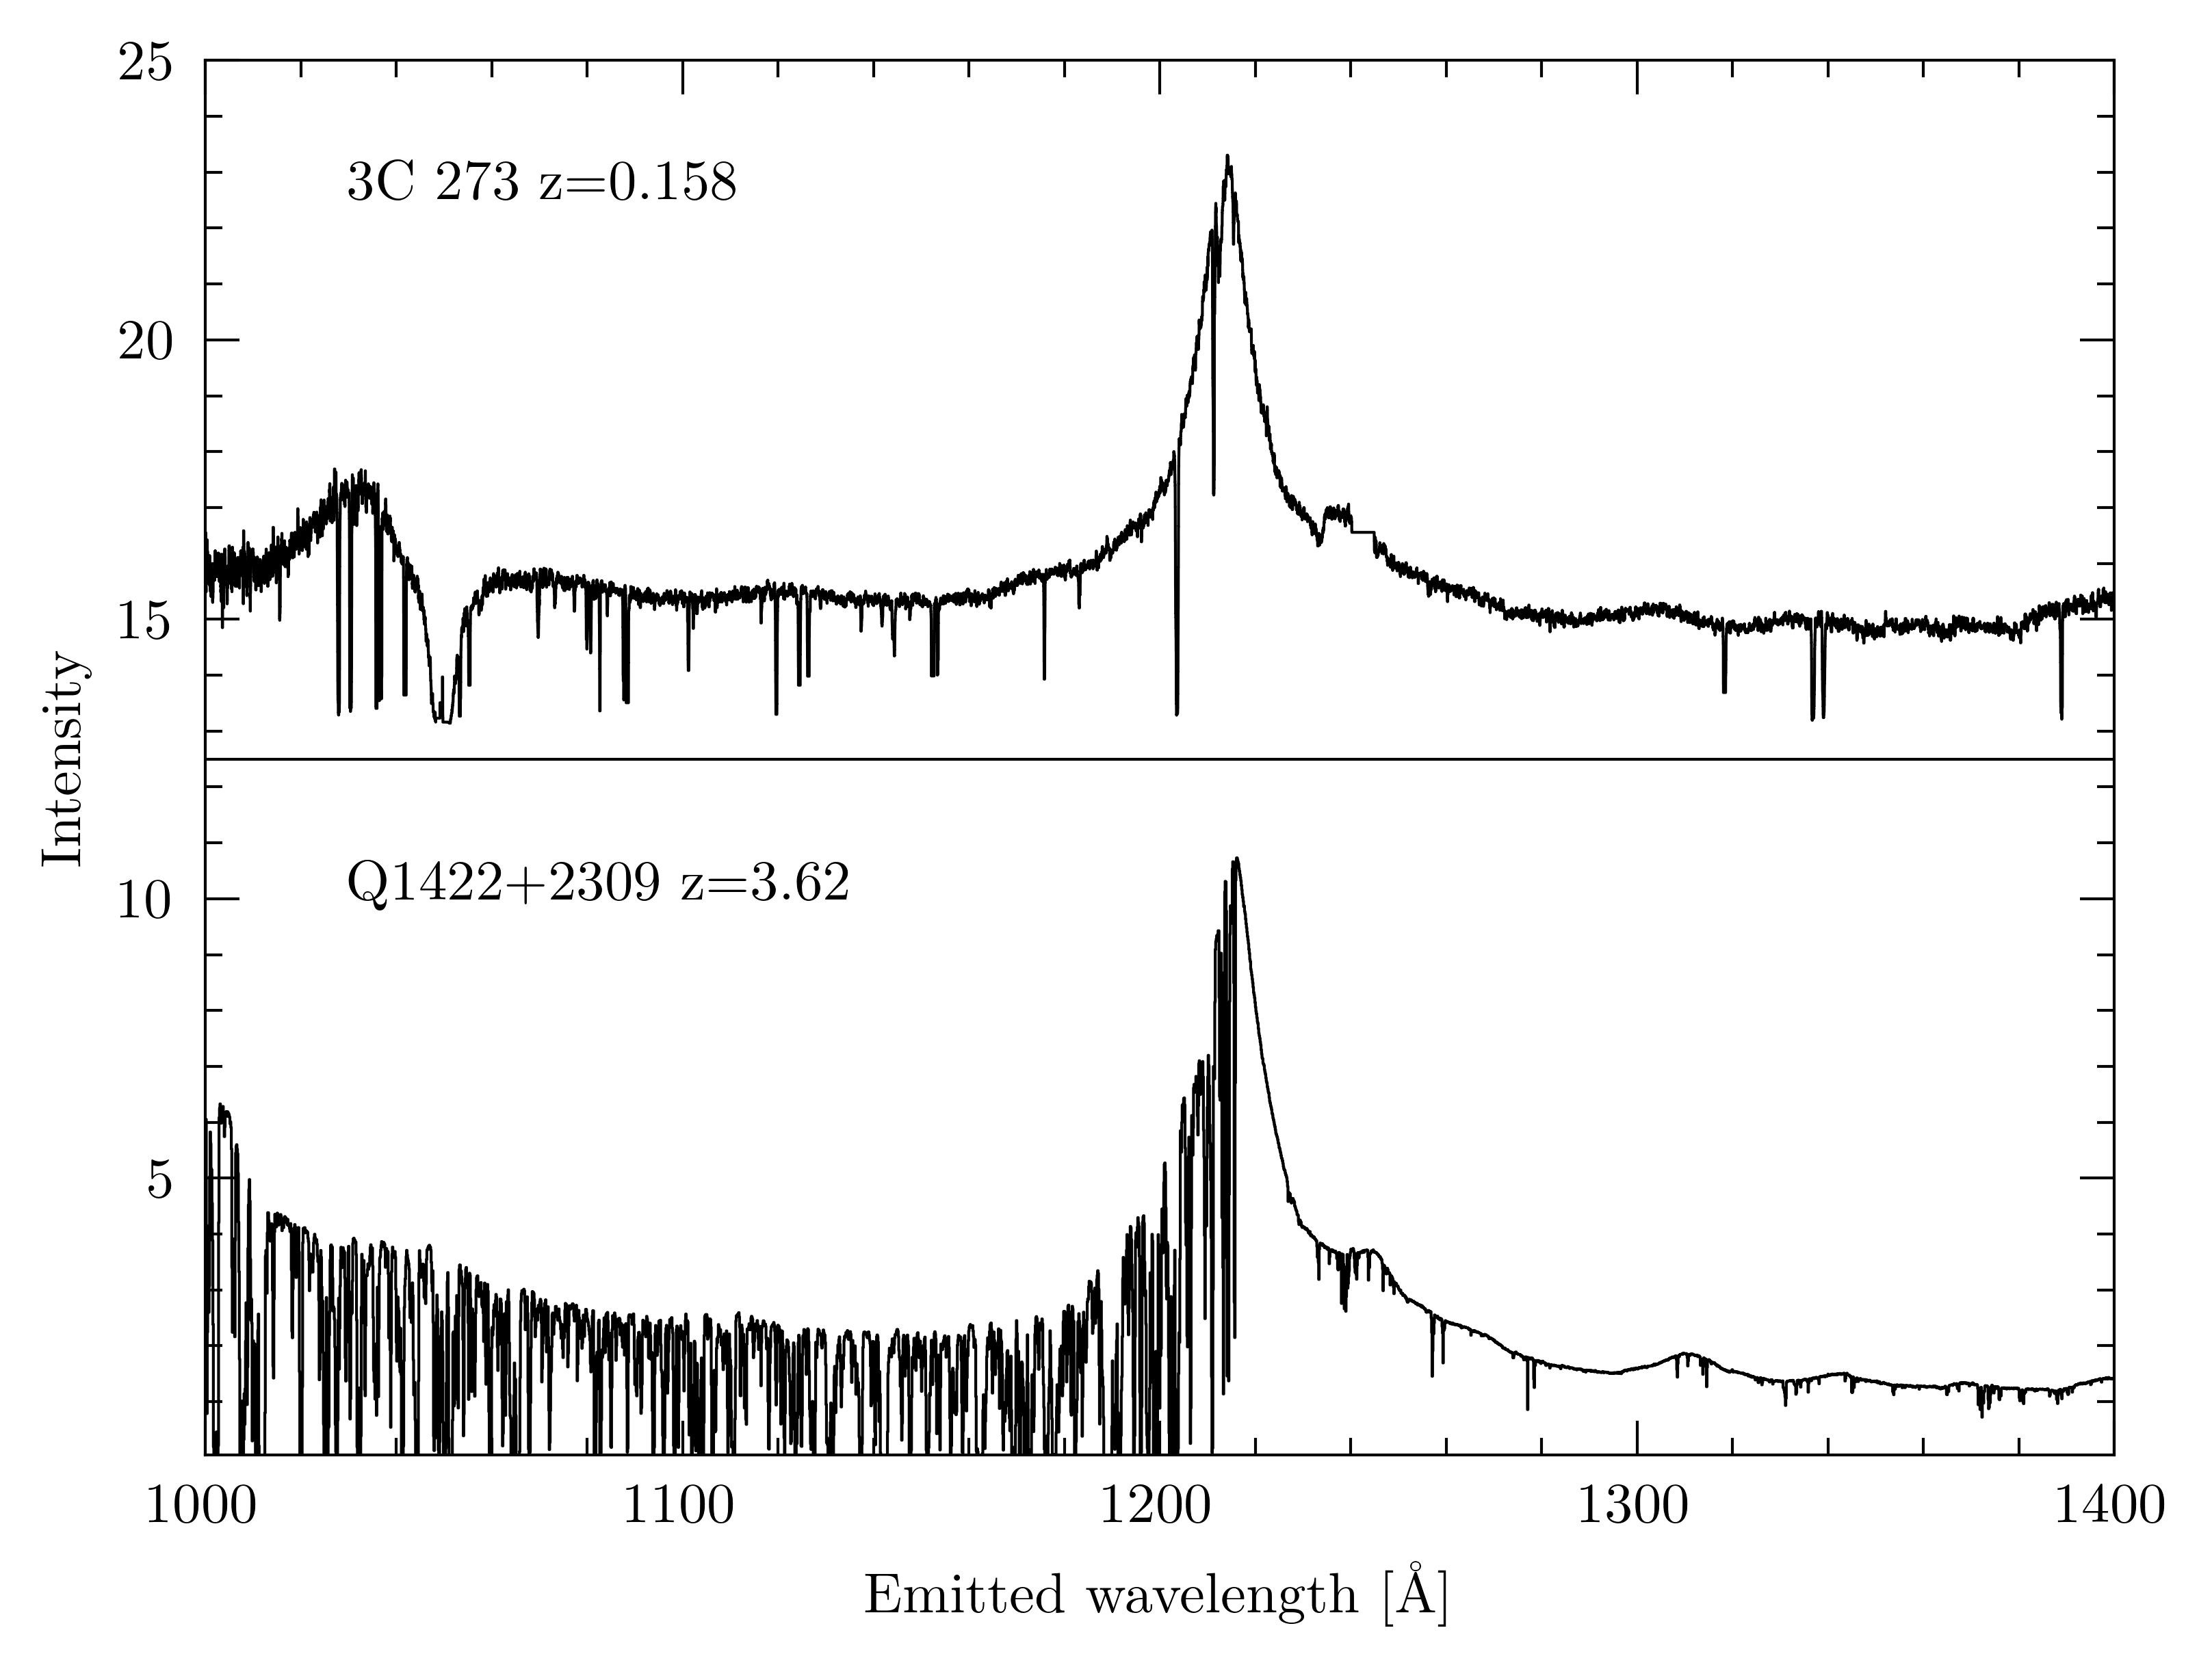

In [11]:
fig,ax = plt.subplots()

fig.set_dpi(dpi)
fig.set_size_inches(wInches,hInches,forward=True)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

plt.xlim(xMin,xMax)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(20))
plt.xlabel(r'Emitted wavelength [\AA]',fontsize=axisFontSize)

plt.ylim(yMin,yMax)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
plt.ylabel(r'Intensity',fontsize=axisFontSize)

# 3C273

plt.plot(lam3C,flx3C,'-',ds='steps',color='black',lw=lwidth,zorder=10)

# 3C273

plt.plot(lamQ1422,flxQ1422,'-',ds='steps',color='black',lw=lwidth,zorder=10)

# separator between spectra

plt.plot([xMin,xMax],[12.5,12.5],'-',color='black',lw=lwidth)

# Label the spectra

plt.text(1030.0,10.0,r'Q1422+2309 z=3.62',color='black',fontsize=axisFontSize)
plt.text(1030.0,22.5,r'3C 273 z=0.158',color='black',fontsize=axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')